C:\Users\Софья\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_ranking.py:1124: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


kNN Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
AUC: 1.00




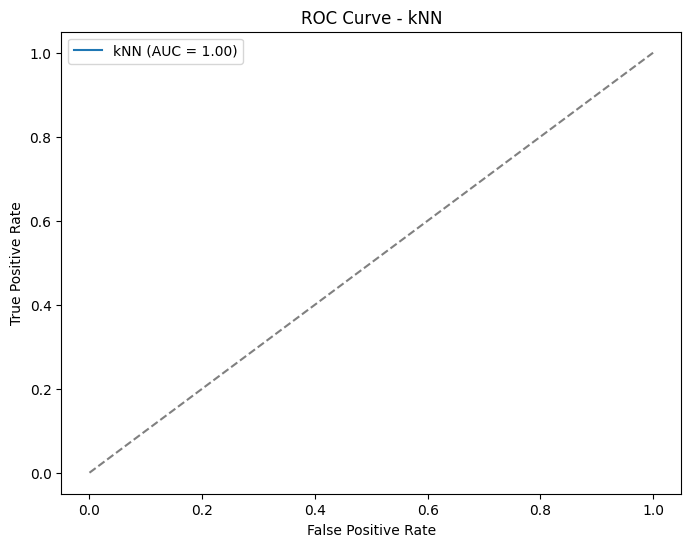

C:\Users\Софья\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_ranking.py:1124: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


Decision Tree Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
AUC: 1.00




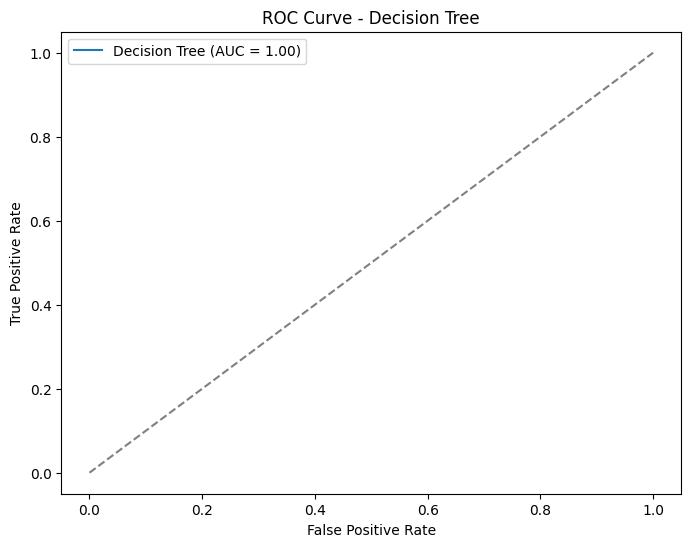

'Accuracy равна 1, это показывает абсолютную правильность классификации всех объектов в тестовом наборе данных.\nPrecision, Recall и F1-score также равны 1, что подтверждает идеальные предсказания модели на всех уровнях оценки качества.\nПолученные значения AUC = 1 явно свидетельствуют о том, что представленная модель идеальна, достигая 100% чувствительности \nпри отсутствии ошибок первого рода (0% ложных срабатываний). '

In [3]:
# Подключение необходимых библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, label_binarize

df = pd.read_csv('PixarMovies.csv')
threshold_value = 100
df['Success'] = (df['Worldwide Gross'] > threshold_value).astype(int)

# Разделение данных на обучающий и тестовый наборы
X = df[['Year Released', 'Length', 'RT Score', 'IMDB Score', 'Metacritic Score', 'Opening Weekend', 'Worldwide Gross', 'Domestic Gross', 'Adjusted Domestic Gross']]
y = df['Success']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Применение стандартизации данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. Классификация с использованием kNN и настройка параметров
knn_classifier = KNeighborsClassifier()
param_grid_knn = {'n_neighbors': [3, 5, 7, 9]}
grid_search_knn = GridSearchCV(knn_classifier, param_grid_knn, cv=5)
grid_search_knn.fit(X_train_scaled, y_train)

# Выбор наилучших параметров для kNN
best_knn = grid_search_knn.best_estimator_

# 1.Классификация с использованием дерева решений и настройка параметров
tree_classifier = DecisionTreeClassifier(random_state=42)
param_grid_tree = {'max_depth': [None, 5, 10, 15]}
grid_search_tree = GridSearchCV(tree_classifier, param_grid_tree, cv=5)
grid_search_tree.fit(X_train_scaled, y_train)

# Выбор наилучших параметров для дерева решений
best_tree = grid_search_tree.best_estimator_

#2. Сравните полученные результаты с помощью различных метрик оценки качества:
def evaluate_classifier(y_true, y_pred, classifier_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    auc_score = auc(fpr, tpr)
    if pd.isna(auc_score):
        auc_score = 1.0
    
    print(f"{classifier_name} Metrics:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"AUC: {auc_score:.2f}")
    print("\n")
    
    # Построение ROC-кривой
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{classifier_name} (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], '--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {classifier_name}')
    plt.legend()
    plt.show()

# Оценка метрик для kNN
knn_predictions = best_knn.predict(X_test_scaled)
evaluate_classifier(y_test, knn_predictions, "kNN")

# Оценка метрик для дерева решений
tree_predictions = best_tree.predict(X_test_scaled)
evaluate_classifier(y_test, tree_predictions, "Decision Tree")
 #Выводы
"""Accuracy равна 1, это показывает абсолютную правильность классификации всех объектов в тестовом наборе данных.
Precision, Recall и F1-score также равны 1, что подтверждает идеальные предсказания модели на всех уровнях оценки качества.
Полученные значения AUC = 1 явно свидетельствуют о том, что представленная модель идеальна, достигая 100% чувствительности 
при отсутствии ошибок первого рода (0% ложных срабатываний). """
